In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sc
import numpy as np


In [31]:
data = pd.read_csv(r"C:\Users\Ishaan\Desktop\DataSet\Data.csv")
pop_data = pd.read_csv(r"C:\Users\Ishaan\Desktop\DataSet\State_data.csv")

data_original = data #copy of the data for later use if required
data

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1627456,2024-12-10,"Worli, Mumbai - MPCB",54.71,124.420000,"89-B, NEERI Building, Dr. Annie Besant Road, W...",Mumbai,18.993616,72.812811,Maharashtra
1627457,2024-12-10,"Yamunapuram, Bulandshahr - UPPCB",53.23,101.340000,"F-5, Yamunapuram, Bulandshahr, Near MMR Mall (...",Bulandshahr,28.406963,77.849831,Uttar Pradesh
1627458,2024-12-10,"Yerramukkapalli, Kadapa - APPCB",75.00,110.750000,"Municipal Corporation Office Complex, Railway ...",Kadapa,14.465052,78.824187,Andhra Pradesh
1627459,2024-12-10,"Zero Point GICI, Gangtok - SSPCB",NaN,NaN,"Near State PWD Office, Zero Point, Gangtok, Si...",Gangtok,27.338530,88.614099,Sikkim


In [7]:
states=np.sort(data["state"].unique().astype(str))
stations=np.sort(data["station"].unique().astype(str))
Date=pd.to_datetime(data["Timestamp"])


# Spatial Aggregation

In [6]:
maxIdx=data.groupby("state")["PM2.5"].mean().argmax()

str(states[maxIdx])

'Delhi'

In [7]:
mask=Date.dt.year==2023
mask2=data[mask]["PM2.5"]>300

maxIdx=data[mask&mask2].groupby("state")["PM2.5"].count().argmax()
str(states[maxIdx])

'Bihar'

In [8]:
maxIdx=data.groupby("state")["PM2.5"].std().argmax()
str(states[maxIdx])

'Delhi'

In [9]:
mask=np.array(Date.dt.year==2021 )|np.array(Date.dt.year==2020)
minArg=data[mask].groupby("state")["PM2.5"].mean().argmin()
str(states[minArg])

'Mizoram'

 # **Temporal Agggregation**

In [29]:
mask= np.array(Date.dt.month==8) & np.array(Date.dt.year==2020)
maxArg=data.loc[mask,"PM2.5"].argmax()
data.loc[mask,"station"].iloc[maxArg]

'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'

In [ ]:
season={"winter":[12,1,2] , "summer" : [3,4,5], "monsoon" : [6,7,8,9]}
mask=np.array(Date.dt.year==2018)

lalData=data.query("station=='Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB' ").loc[:,["Timestamp","PM2.5"]]

,Timestamp,PM2.5
245,2017-01-01,NaN
806,2017-01-02,NaN
1367,2017-01-03,NaN
1928,2017-01-04,NaN
2489,2017-01-05,NaN
...,...,...
1624901,2024-12-06,28.15
1625462,2024-12-07,6.60
1626023,2024-12-08,18.33
1626584,2024-12-09,30.84


# **Spatio-temporal aggregation [3 marks]**

1) For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?

2) Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?

3) Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2015 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)


In [11]:
# Q)1
month_grp = {
    6: "Monsoon",
    7: "Monsoon",
    8: "Monsoon",
    9: "Monsoon",

    3: "Summer",
    4: "Summer",
    5: "Summer",
}
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Seasons'] = data['Timestamp'].dt.month.map(month_grp)
filtered_data = data[data['Timestamp'].dt.year == 2022]

grouped = filtered_data.groupby(['Seasons', 'state'])['PM2.5'].mean()
per = ( grouped['Monsoon'] - grouped['Summer'] )*100/ grouped['Summer']
print(f"The state with the maximum change is, {per.abs().idxmax()} : {per.abs().max()}")


The state with the maximum change is, Assam : 61.17641855538734


C:\Users\Ishaan\AppData\Local\Temp\ipykernel_6772\4001987422.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


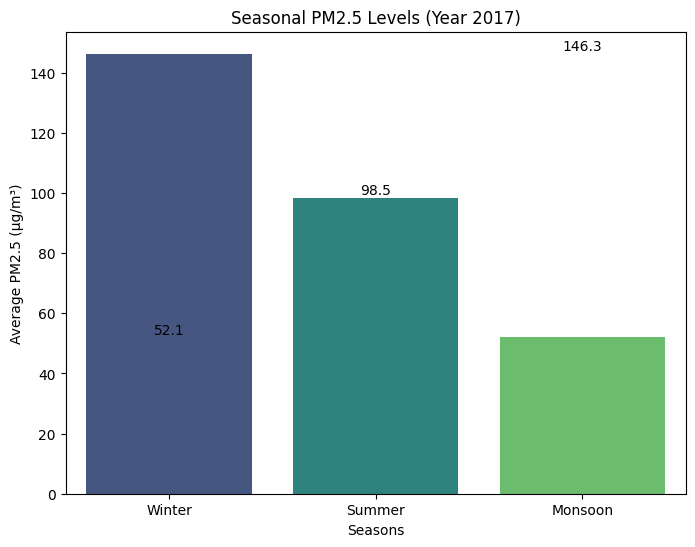

C:\Users\Ishaan\AppData\Local\Temp\ipykernel_6772\4001987422.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


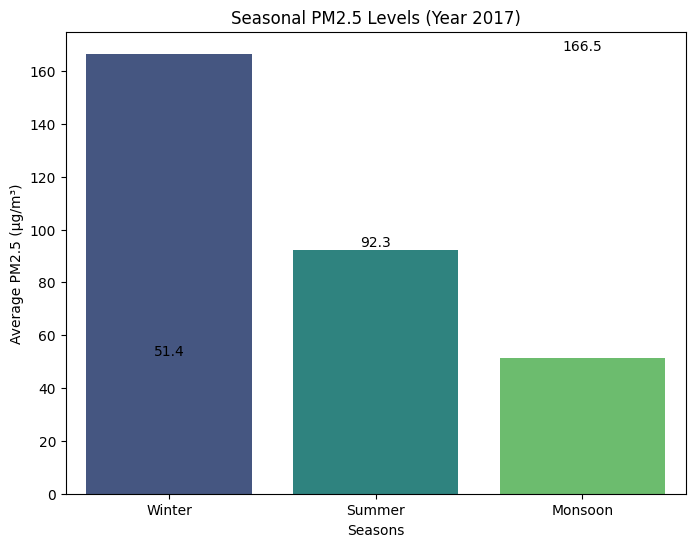

C:\Users\Ishaan\AppData\Local\Temp\ipykernel_6772\4001987422.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


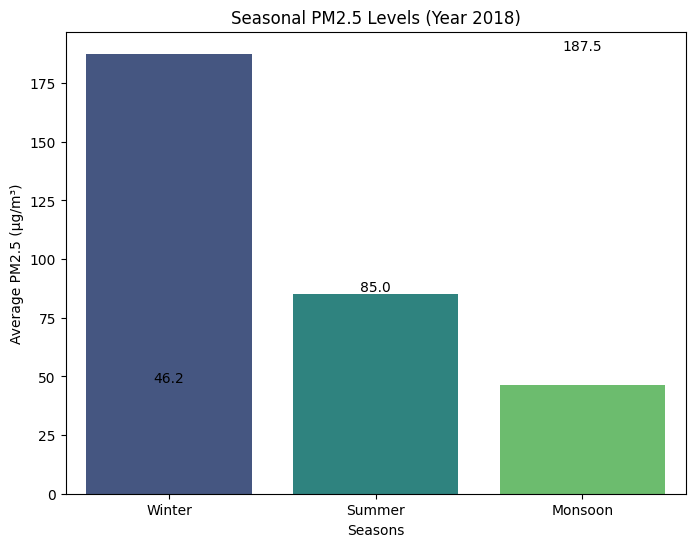

C:\Users\Ishaan\AppData\Local\Temp\ipykernel_6772\4001987422.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


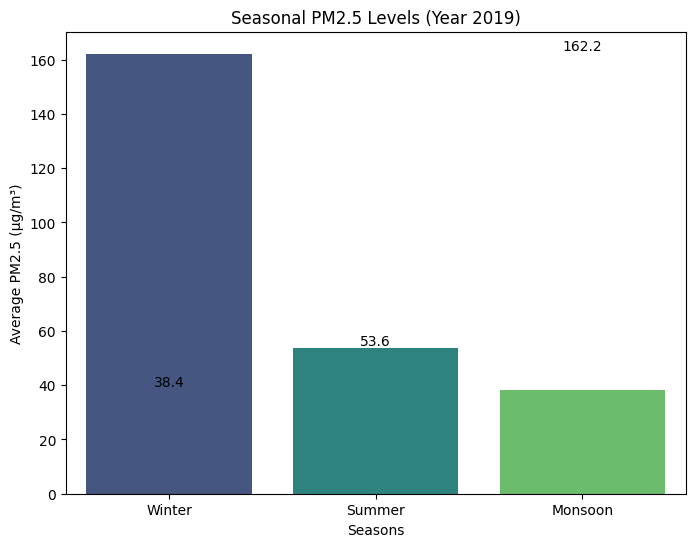

C:\Users\Ishaan\AppData\Local\Temp\ipykernel_6772\4001987422.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


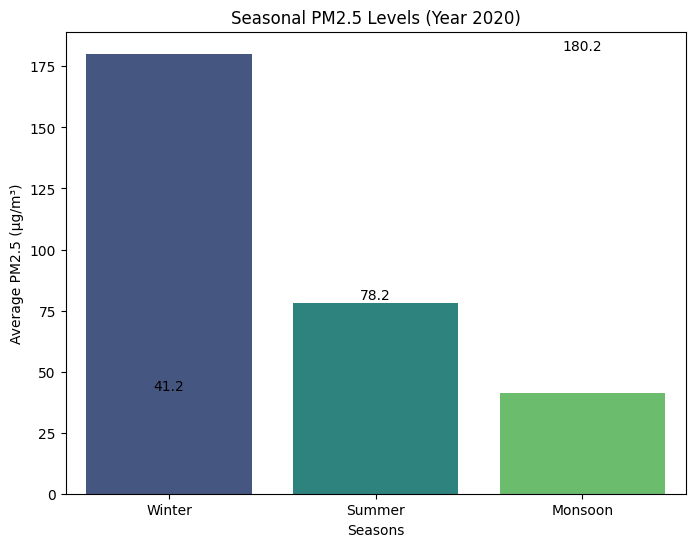

C:\Users\Ishaan\AppData\Local\Temp\ipykernel_6772\4001987422.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


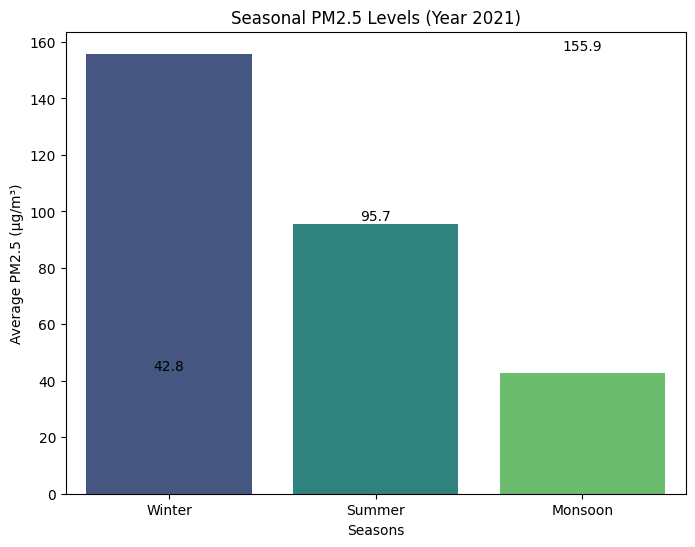

C:\Users\Ishaan\AppData\Local\Temp\ipykernel_6772\4001987422.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


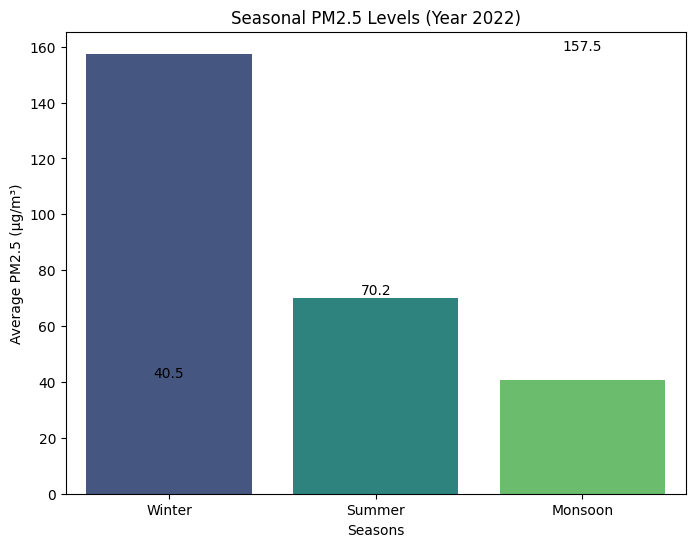

In [12]:
'''2) Plot the average PM2.5 levels for Delhi across each season (Winter: December-February,
 Summer: March-May, Monsoon: June-September)
 from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?'''

delhi_data = data[data['city'] == 'Delhi']
month_grp = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Summer', 4: 'Summer', 5: 'Summer',
    6: 'Monsoon', 7: 'Monsoon', 8: 'Monsoon', 9: 'Monsoon'
}

delhi_seas = delhi_data.copy()
delhi_seas['Seasons'] = delhi_seas['Timestamp'].dt.month.map(month_grp)

delhi_seas['Year'] = delhi_seas['Timestamp'].dt.year
delhi_seas.loc[delhi_seas['Timestamp'].dt.month == 12, 'Year'] += 1

delhi_yr = []
for i in range(2017, 2024):
    yearly_data = delhi_seas[delhi_seas['Year'] == i]
    delhi_yr.append(yearly_data)

for i, df in enumerate(delhi_yr):
    if df.empty: continue

    seasonal_avg = df.groupby('Seasons')['PM2.5'].mean().reset_index()

    plt.figure(figsize=(8,6))
    sns.barplot(
        x='Seasons',
        y='PM2.5',
        data=seasonal_avg,
        order=['Winter', 'Summer', 'Monsoon'],
        palette='viridis'
    )
    plt.title(f"Seasonal PM2.5 Levels (Year {df['Timestamp'].dt.year.iloc[1]})")
    plt.xlabel("Seasons")
    plt.ylabel("Average PM2.5 (µg/m³)")

    for index, row in seasonal_avg.iterrows():
        plt.text(index, row['PM2.5'], f"{row['PM2.5']:.1f}",
                ha='center', va='bottom', fontsize=10)

    plt.show()

It can clearly be seen that across the years 2017 to 2022 that there is higher amount of pollution in winter, followed by summer and least amount of pollution in monsoon.

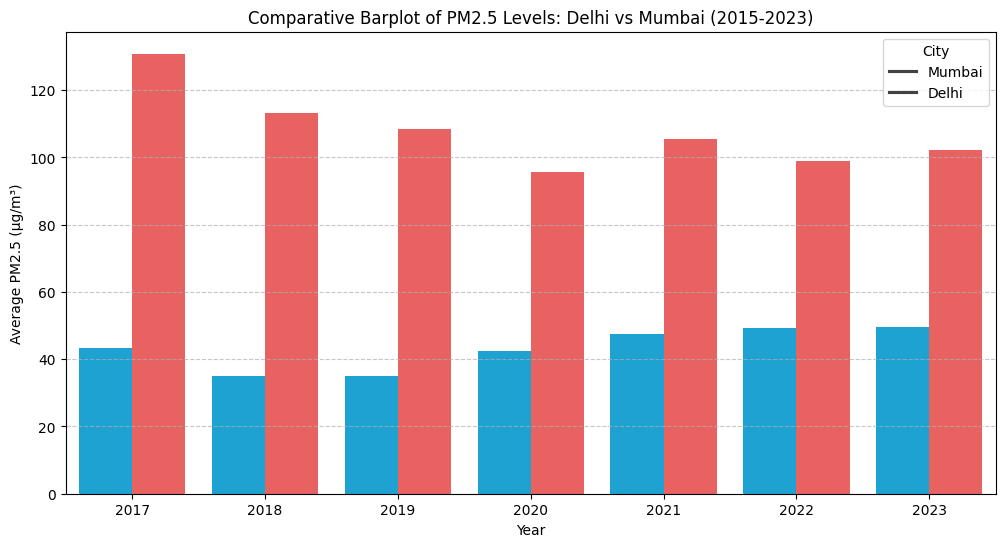

Mumbai's PM2.5 fluctuation (standard deviation): 40.18
Delhi's PM2.5 fluctuation (standard deviation): 84.93
Delhi had more fluctuations in PM2.5 levels.


In [13]:
'''3) Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2015 to 2023.
 Which city had more fluctuations? (Hint: Think what fluctuation means)'''
mumbai_data = data[data['city'] == 'Mumbai']
mum_yr = []
del_yr = []
for i in range(2015, 2024):
  mum_yr.append(mumbai_data[ mumbai_data['Timestamp'].dt.year == i ])
  del_yr.append(delhi_data[ delhi_data['Timestamp'].dt.year == i ])

mumbai_combined = pd.concat(mum_yr)
delhi_combined = pd.concat(del_yr)

mumbai_combined['Year'] = mumbai_combined['Timestamp'].dt.year
delhi_combined['Year'] = delhi_combined['Timestamp'].dt.year

mumbai_avg = mumbai_combined.groupby('Year')['PM2.5'].mean().reset_index()
delhi_avg = delhi_combined.groupby('Year')['PM2.5'].mean().reset_index()

comparison = pd.merge(mumbai_avg, delhi_avg, on='Year', suffixes=('_Mumbai', '_Delhi'))

plt.figure(figsize=(12, 6))
comparison_melted = comparison.melt(id_vars='Year', value_vars=['PM2.5_Mumbai', 'PM2.5_Delhi'],
                                    var_name='City', value_name='PM2.5')

sns.barplot(data=comparison_melted, x='Year', y='PM2.5', hue='City', palette=['#00B0F0', '#FF4B4B'])

plt.title('Comparative Barplot of PM2.5 Levels: Delhi vs Mumbai (2015-2023)')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.legend(title='City', labels=['Mumbai', 'Delhi'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

mumbai_std = mumbai_combined['PM2.5'].std()
delhi_std = delhi_combined['PM2.5'].std()

print(f"Mumbai's PM2.5 fluctuation (standard deviation): {mumbai_std:.2f}")
print(f"Delhi's PM2.5 fluctuation (standard deviation): {delhi_std:.2f}")

if mumbai_std > delhi_std:
    print("Mumbai had more fluctuations in PM2.5 levels.")
else:
    print("Delhi had more fluctuations in PM2.5 levels.")


In [14]:
mum_yr

[Empty DataFrame
 Columns: [Timestamp, station, PM2.5, PM10, address, city, latitude, longitude, state, Seasons]
 Index: [],
 Empty DataFrame
 Columns: [Timestamp, station, PM2.5, PM10, address, city, latitude, longitude, state, Seasons]
 Index: [],
         Timestamp                               station       PM2.5  \
 28     2017-01-01   Bandra Kurla Complex, Mumbai - IITM         NaN   
 29     2017-01-01   Bandra Kurla Complex, Mumbai - MPCB         NaN   
 30     2017-01-01                 Bandra, Mumbai - MPCB  118.202604   
 49     2017-01-01          Borivali East, Mumbai - IITM         NaN   
 50     2017-01-01          Borivali East, Mumbai - MPCB         NaN   
 ...           ...                                   ...         ...   
 204693 2017-12-31  Siddharth Nagar-Worli, Mumbai - IITM         NaN   
 204700 2017-12-31                   Sion, Mumbai - MPCB         NaN   
 204740 2017-12-31             Vasai West, Mumbai - MPCB         NaN   
 204754 2017-12-31        Vile

# **Population-Based [3 Marks]**

1)Which state in India has the highest number of monitoring stations relative to its population?

2)Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.

3)Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?
X-axis: Population density (people per square kilometer).
Y-axis: Average PM2.5 concentration.
Use a scatter plot to show the relationship, where each point represents a state.

In [ ]:

pop_data_original = pop_data

FileNotFoundError: [Errno 2] No such file or directory: 'State_data.csv'

In [ ]:
'''1)Which state in India has the highest number of monitoring stations relative to its population?'''
a = data.groupby('state')['station']
a = a.nunique()
st_pop = pd.merge(pop_data, a, left_on = 'State', right_on = 'state' )
st_pop['st_per_capita'] = st_pop['station'] / st_pop['Population']
ind = st_pop['st_per_capita'].argmax()
st_pop.iloc[ind]

State            Chandigarh
Population          1055450
Area (km2)              114
station                   3
st_per_capita      0.000003
Name: 29, dtype: object

<Axes: xlabel='city', ylabel='poll_per_cap'>

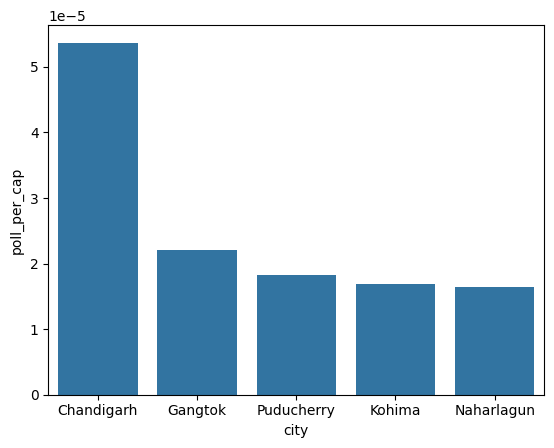

In [ ]:
'''2)Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.'''
st_poll = pd.merge(data, pop_data, left_on = 'state', right_on = 'State' )
st_poll["poll_per_cap"] = st_poll['PM2.5'] / st_poll['Population']
st_poll.drop(columns = 'State', axis=1)
a = st_poll.groupby('city')['poll_per_cap'].mean()
a = a.nlargest(5)
sns.barplot(data=a)

<Axes: xlabel='density', ylabel='PM2.5'>

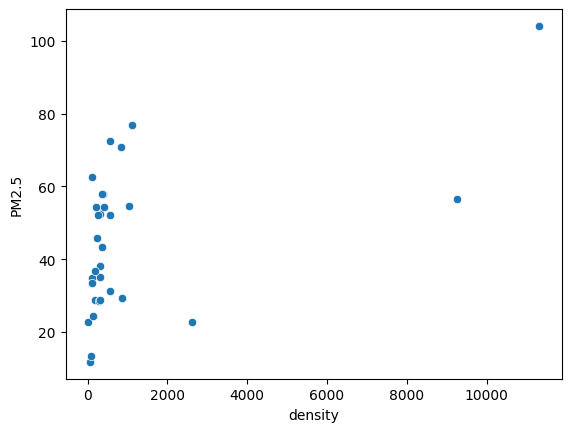

In [ ]:
'''Plot the relationship between population density and average PM2.5 concentration for each state.
What conclusion can you draw about the correlation between population density and pollution?
X-axis: Population density (people per square kilometer).
Y-axis: Average PM2.5 concentration.
Use a scatter plot to show the relationship, where each point represents a state.'''

st_poll['density'] = st_poll['Population'] / st_poll["Area (km2)"]
a = st_poll.groupby('state')[["density", "PM2.5"]].mean()
sns.scatterplot(data = a ,x='density', y='PM2.5')

In [ ]:
st_poll

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state,Seasons,State,Population,Area (km2),poll_per_cap,density
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh,NaN,Chhattisgarh,25545198,135192,NaN,188.954953
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh,NaN,Chhattisgarh,25545198,135192,NaN,188.954953
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan,NaN,Rajasthan,68548437,342239,NaN,200.294055
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra,NaN,Maharashtra,112374333,307713,NaN,365.192023
4,2017-01-01,"Alandi, Pune - IITM",NaN,NaN,System Of Air Quality And weather Forecasting ...,Pune,18.675076,73.892743,Maharashtra,NaN,Maharashtra,112374333,307713,NaN,365.192023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563697,2024-12-10,"Worli, Mumbai - MPCB",54.71,124.420000,"89-B, NEERI Building, Dr. Annie Besant Road, W...",Mumbai,18.993616,72.812811,Maharashtra,NaN,Maharashtra,112374333,307713,4.868549e-07,365.192023
1563698,2024-12-10,"Yamunapuram, Bulandshahr - UPPCB",53.23,101.340000,"F-5, Yamunapuram, Bulandshahr, Near MMR Mall (...",Bulandshahr,28.406963,77.849831,Uttar Pradesh,NaN,Uttar Pradesh,199812341,240928,2.664000e-07,829.344622
1563699,2024-12-10,"Yerramukkapalli, Kadapa - APPCB",75.00,110.750000,"Municipal Corporation Office Complex, Railway ...",Kadapa,14.465052,78.824187,Andhra Pradesh,NaN,Andhra Pradesh,49577103,162975,1.512795e-06,304.200663
1563700,2024-12-10,"Zero Point GICI, Gangtok - SSPCB",NaN,NaN,"Near State PWD Office, Zero Point, Gangtok, Si...",Gangtok,27.338530,88.614099,Sikkim,NaN,Sikkim,610577,7096,NaN,86.045237


**Area Based [3 Marks]**

Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.
X-axis: States.
Y-axis: PM2.5 concentration per square kilometer.
Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.

Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.

Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.


<Axes: xlabel='state', ylabel='PM2.5_per_cap'>

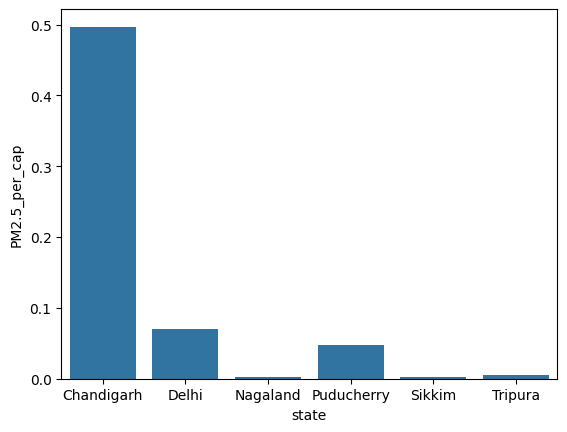

In [ ]:
'''
Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.
X-axis: States.
Y-axis: PM2.5 concentration per square kilometer.
Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.'''

a = st_poll
a['PM2.5_per_cap'] = st_poll["PM2.5"] / st_poll["Area (km2)"]
a = a.groupby('state')["PM2.5_per_cap"].mean()
c = a.nlargest(7)
c = c.iloc[-1]
b = a > c
a = a[b]
sns.barplot(data=a, )


In [ ]:
'''Compare the total number of monitoring stations per square kilometer in each state.
 Identify the state with the highest density of monitoring stations relative to its area.
 Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.'''

a = st_poll.groupby(['state'])['station'].nunique()
state_data = pd.merge(pop_data, a, left_on='State',right_on= 'state')
state_data['st_per_cap'] = state_data['station'] / state_data["Area (km2)"]
ind = state_data['st_per_cap'].argmax()
state_data.iloc[ind]

State            Delhi
Population    16787941
Area (km2)        1484
station             40
st_per_cap    0.026954
Name: 17, dtype: object

In [ ]:
'''Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021.
 Given that both states have similar area sizes but different population densities,
 analyze how population density impacts pollution levels in these two states.'''



In [ ]:
state_data

,State,Population,Area (km2),station,st_per_cap
0,Uttar Pradesh,199812341,240928,57,0.000237
1,Maharashtra,112374333,307713,97,0.000315
2,Bihar,104099452,94163,36,0.000382
3,West Bengal,91276115,88752,22,0.000248
4,Madhya Pradesh,72626809,308252,29,0.000094
5,Tamil Nadu,72147030,130058,36,0.000277
6,Rajasthan,68548437,342239,46,0.000134
7,Karnataka,61095297,191791,42,0.000219
8,Gujarat,60439692,196024,17,0.000087
9,Andhra Pradesh,49577103,162975,13,0.000080
